In [98]:
from scipy import spatial
import string
import numpy as np
from fuzzywuzzy import fuzz, process
import seaborn
import matplotlib.pyplot as plt
import random

In [96]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\diamo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


True

In [99]:
word_list = words.words()

In [83]:
seaborn.set_theme()

In [76]:
ord('a')

97

In [56]:
charset = ''.join([
    string.ascii_lowercase,
#     string.ascii_uppercase,
#     string.digits,
#     string.punctuation,
    ' '
])

In [57]:
def pad(x, n=10):
#     s = ' ' * n
    return x + ' ' * (n - len(x))

In [58]:
def one_hot(text, onehot=True):
    text = text.lower()
    encoded = []
    for c in text:
        if c in charset:
            encoded.append(charset.index(c))
        else:
            encoded.append(charset.index(' '))
#         encoded = np.expand_dims(encoded, 1)
    return np.array(encoded)

In [113]:
# terms

# list(zip([words, terms]))

# [(w, t) for w, t in zip([words, terms])]

42


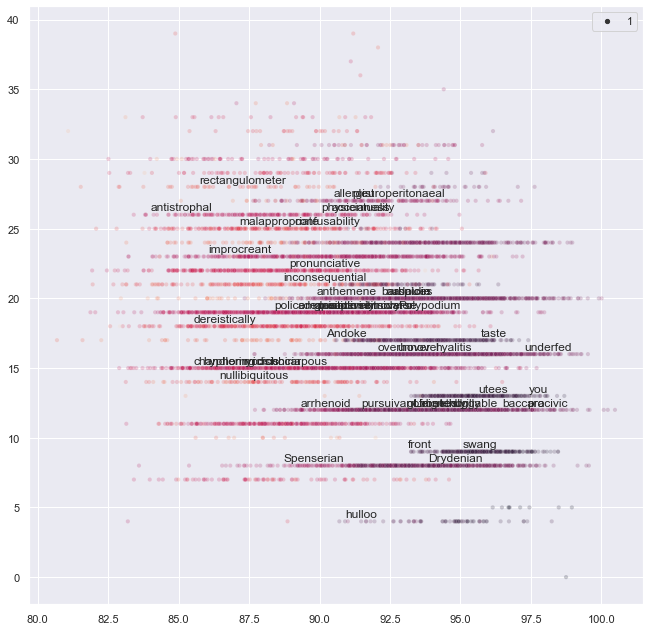

In [190]:
# words = ['What a piece of work is a man! How noble in reason, how infinite in faculty!']
words = []
a = 'you may live to see man-made horrors beyond your comprehension'

words += a.replace('-', ' ').split()
words += random.choices(word_list, k=10000)

ref = 'complex analysis is the field that studies'

max_len = max(map(len, words+[ref]))
print(max_len)
ref_ = one_hot(pad(ref, n=max_len))
terms = [one_hot(pad(t, n=max_len)) for t in words]



positions, labels = zip(*[([np.linalg.norm(t-ref_), fuzz.token_set_ratio(w, ref)], w) for w, t in zip(words, terms)])
lengths = list(map(len, words))

x, y = np.array(positions).T
plot = seaborn.scatterplot(x=x, y=y, size=1, alpha=0.2, c=lengths)
seaborn.set(rc={'figure.figsize':(11, 11)})
offset = np.array([0, 0.3])
for i, l in enumerate(labels):
    if i % (len(labels) // 50) == 0:
        plot.text(*positions[i]+offset, 
             l, horizontalalignment='center')

In [78]:
positions

([30.397368307141328, 0],
 [26.076809620810597, 57],
 [13.638181696985855, 25],
 [31.38470965295043, 0],
 [23.916521486202797, 29],
 [22.20360331117452, 57],
 [7.0, 75],
 [26.981475126464083, 0],
 [33.63034344160047, 20],
 [24.677925358506133, 0],
 [51.97114584074513, 24])

In [67]:
list(zip(words, terms))[0]

('you', array([24, 14, 20, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26]))